pertama lakukan pengekstrakan file zip dari data yang telah didownload pada kaggle

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/archive.zip', "r") as zip_ref:
    zip_ref.extractall("content")

Selanjutnya import library yang akan digunakan

In [ ]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/content/london_crime_by_lsoa.csv')

NameError: ignored

Mari kita lihat 5 data awal dan 5 data akhir

In [ ]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Mari cari tahu berapa banyak entri di kumpulan data

In [ ]:
print(data.shape)

(13490604, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
data['year'].value_counts()

13490604

In [ ]:
data['value'].value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

In [ ]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
sum_of_values = []

In [ ]:
for year in years:
  sum = data[(data['year'] == year)]
  sum_of_values.append(sum['value'].sum())

In [ ]:
sum_of_values

[738641, 717214, 715324, 724915, 737329, 686407, 680183, 711624, 736121]

lakukan visualisasi jumlah kejahatan pada tahun

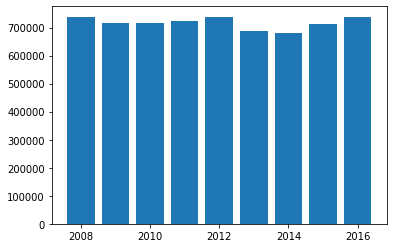

In [ ]:
plt.bar(years, sum_of_values)
plt.show()

In [ ]:
memvisualisasikan jumlah kejahatan pada tiap tempat berdasarkan tahun

In [ ]:
boroughs = data['borough'].unique()
boroughs

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [ ]:
Crydon = data.pivot_table('')

In [ ]:
major_category = data['major_category'].unique()
major_category

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [ ]:
minor_category = data['minor_category'].unique()
minor_category

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [ ]:
sum_of_crime_each_borough = []

In [ ]:
for borough in boroughs:
  sum = data[(data['borough'] == borough)]
  sum_of_crime_each_borough.append(sum['value'].sum())

In [ ]:
sum_of_crime_each_borough

[260294,
 181568,
 184349,
 183562,
 204741,
 251562,
 186772,
 262024,
 100987,
 213272,
 292178,
 96771,
 209680,
 138947,
 149447,
 89306,
 455028,
 217119,
 193880,
 116848,
 215137,
 227551,
 278809,
 212191,
 203879,
 275147,
 114136,
 171981,
 230286,
 228613,
 185259,
 115654,
 780]